# Data fitting and regression

Before you start coding, please read the following notes on regression here:

https://github.com/wbandabarragan/computational-physics-1/blob/main/extra-notes/notes-regression.pdf

The steps you need to follow to sucessfully carry out a meaninful regression are:

- Inspect the data (plot and look at it first).

- Check if the variables are correlated or if the relation is monotonic. Verify if you can linearise the data, i.e. if you can apply a change of variable and make a plot in which the relation looks linear.

- Propose a physically-motivated model for the data. The model should have free parameters.

- Find the free parameters of the model by fitting the data via a regression. A regression can be done via optimisation, e.g. by minimising a functional. A popular optimisation method is the method of least squares, see: https://en.wikipedia.org/wiki/Least_squares). Python has several tools to carry out regressions.


## Example 1:

Let us imagine we measure the thickness of a book for different number of pages. We count the number of pages (variable book pages) and use a Vernier to measure the thickness in units of $mm$.

Then, we save the experimental data into a file named: "books.dat"


In [1]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data input using Pandas

We need to inspect the data.

In [2]:
# We use Pandas.DF

df = pd.read_csv("../DATA/books.dat", sep = r"\s+")

#print(df)

# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(thick )

### Plotting the data:

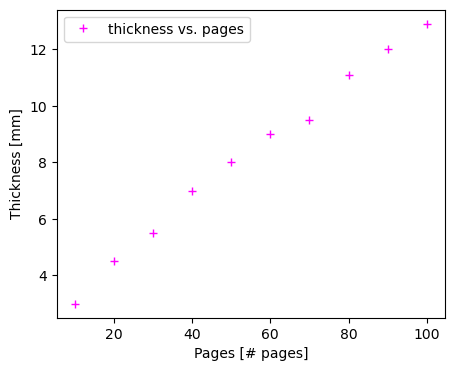

In [3]:
# Figure environment
plt.figure(figsize = (5,4))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

Analising correlation and monotonicity:

### Spearman's coefficient

The Spearman correlation evaluates the monotonic relationship between 2 variables.

Linearity is not essential.

A monotonic relationship between 2 variables implies one of two situations:

- (Situation 1) As the value of one variable increases, so does the value of the other variable, OR,

- (Situation 2) As the value of one variable increases, the other variable value decreases.

Not necessarily at a constant rate.


### Pearson 'r' coefficient
The Pearson correlation coefficient (r) is an indicator of how strong a linear correlation between 2 variables is.

It can take values between -1 and 1.
%attachment:data-fitting.jpeg
 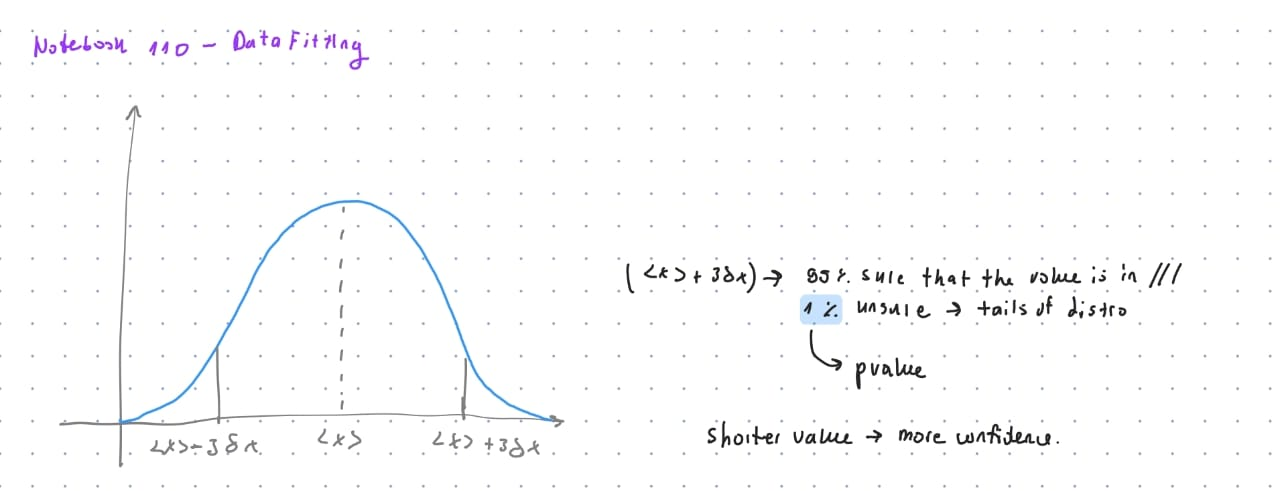


#### To compute these oefficients, we need to import scipy:

conda install scipy

In [4]:
import scipy.stats as st

In [5]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick) # the relation is monotonic

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick) #The relation is linear, pvalue=  se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta.
##La probabilidad de observar los resultados del estudio, u otros más alejados de la hipótesis nula, si la hipótesis nula fuera cierta.
##P value= can be the tails of the distribution
print("Spearman:\n", sp)

print("Pearson:\n", pe)


Spearman:
 SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)
Pearson:
 PearsonRResult(statistic=0.9967647822032424, pvalue=4.774249416992818e-10)


### Linear regression

We usually need a model when we want to perform a regression. In this case, it is reasonable to use a line since we expect the number of pages and the tickness are linearly correlated.

Our model is then:

$thickness = m(pages) + b$


Note that $m$ and $b$ have units of $mm/page$ and $mm$, respectively.

## Method 1. Using np.polyfit()

np.polyfit() returns the coefficients $m$ and $b$.
See the documentation here:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [6]:
# Get coeffcients - best fit parameters (LM method)

m, b = np.polyfit(pages, thick, 1)

In [7]:
# Print to check

print('slope =', m, ' intercept=', b)

slope = 0.10793939393939393  intercept= 2.31333333333333


In [8]:
# Get fitting function

fit_thick = m*pages + b

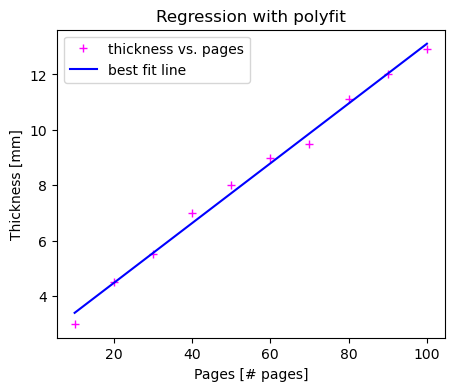

In [9]:
# replot  the data with the fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with polyfit")
plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Method 2. Using Scipy functions
The function curve_fit() from the scipy.optimize package can be used.

See documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [10]:
# Import the scipy library
import scipy.optimize as opt

In [11]:
# Define the model function to fit the data

def fit_model(x_values, m, b):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values + b
    
    return y_values


In [12]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, pages, thick)

# Double check
#print(cova) # Covariance matrix
#print(coef) # The fitting parameters (optimal)
#print(type(coef)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

thickness = 0.10794 * pages + 2.31333


In [13]:
print(coef) # The fitting parameters (optimal)
print(coef[0])
print(coef[1])

print(*coef)

[0.10793939 2.31333333]
0.10793939391432363
2.3133333347949634
0.10793939391432363 2.3133333347949634


In [14]:
# Define the fitting data
fit_thick2 = fit_model(pages, coef[0], coef[1])

# Another way to get the fit data
#fit_thick2 = fit_model(pages, *coef)
print(fit_thick2)

[ 3.39272727  4.47212121  5.55151515  6.63090909  7.71030303  8.78969697
  9.86909091 10.94848485 12.02787879 13.10727273]


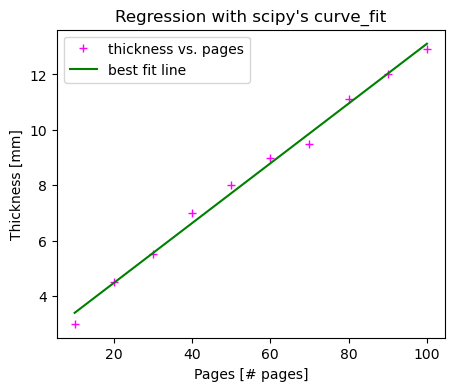

In [15]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label ="thickness vs. pages" )#'thickness = %.5f * pages + %.5f' % (coef[0], coef[1]) or"thickness vs. pages"

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Compute $l\sigma$ errors on the parameters

We can use:

perr=np.sqrt(pcov)

In [16]:
print(cova)
print(cova.shape) 

[[ 9.46923732e-06 -5.20808055e-04]
 [-5.20808055e-04  3.64565645e-02]]
(2, 2)


In [17]:
#For errrors we can get the errors from the covariance matrix
err=np.sqrt(np.diag(cova))
print("Error in m is %.5f" % err[0])
print("Error in b is %.5f" % err[1],"\n")

#Print results:
print("Thickness= (%.5f +/- %.5f) * pages + (%.5f +/- %.5f)" % (coef[0], err[0], coef[1], err[1]))

Error in m is 0.00308
Error in b is 0.19094 

Thickness= (0.10794 +/- 0.00308) * pages + (2.31333 +/- 0.19094)


In [18]:
# Define the model function to fit the data

def fit_model2(x_values, m):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope
    Output: y_values (linear finction)
    """
    y_values = m * x_values
    
    return y_values

In [19]:
# Call the curve_fit() function
coef2, cova2 = opt.curve_fit(fit_model2, pages, thick)

# Double check
#print(cova2) # Covariance matrix
#print(coef2) # The fitting parameters (optimal)
#print(type(coef2)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages' % (coef2[0]))

thickness = 0.14099 * pages


In [20]:
# Define the fitting data
#fit_thick3 = fit_model(pages, coef[0])

# Another way to get the fit data
fit_thick3 = fit_model2(pages, *coef2)

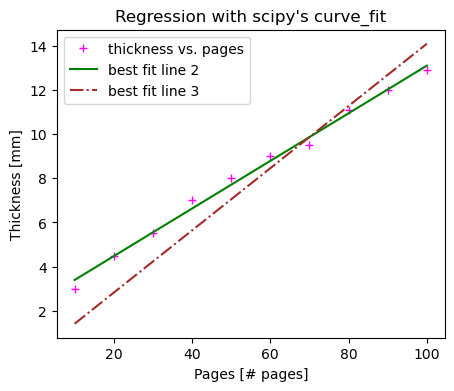

In [21]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line 2")

plt.plot(pages, fit_thick3, color = "brown",\
        linestyle = "-.", label = "best fit line 3")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Example 2: Free-fall experiment:

We wish to measure the acceleration of gravity based on data from a free-fall experiment in which we drop an object and measure the time it takes for it to reach different distanteces. The object starts from rest.

Data file: https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/data_freefall.csv

In [22]:
# Use pandas to open the file and place the data into a DF

df_freefall = pd.read_csv("../DATA/data_freefall.csv", sep = ",")

print(df_freefall)

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


In [23]:
# Place the data into numpy arrays

time = np.array(df_freefall["Time (s)"])
ypos = np.array(df_freefall["Position (m)"])

#print(ypos)

### Plotting:

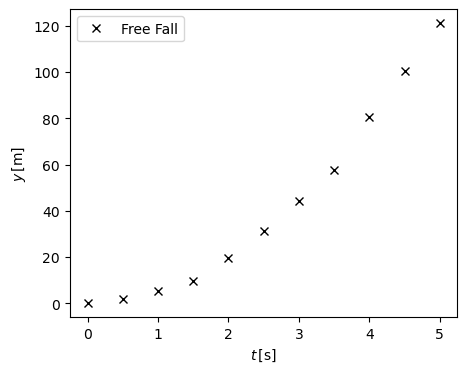

In [24]:
# Fig env:

plt.figure(figsize=(5,4))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall")

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

In [25]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, ypos)

# 2. Pearson coefficient
pe = st.pearsonr(time, ypos)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=1.0, pvalue=0.0)
Pearson:
 PearsonRResult(statistic=0.9626893939403707, pvalue=2.0763269932273846e-06)


### 1st Approach:

We need a physically-motivated model;

$$y = \alpha\,t^2$$

where $\alpha= \frac{g}{2}$

## Scipy regression:

In [26]:
# Define our regression model

def fit_mruv(t_values, alpha):
    """
    Parabolic model with 1 free parameter.
    Inputs: t_values are the times, alpha = gravity/2
    Output: y_values
    """
    y_values = alpha*t_values**2
    
    return y_values

In [27]:
# Call the curve_fit function using our model

coef, cova = opt.curve_fit(fit_mruv, time, ypos)

# Print result:
print('y = %.5f * time^2' % (coef[0]))

y = 4.90276 * time^2


### Regression result:

In [28]:
# Evaluate the time using our regression model and alpha

ypos_fit = fit_mruv(time, *coef)


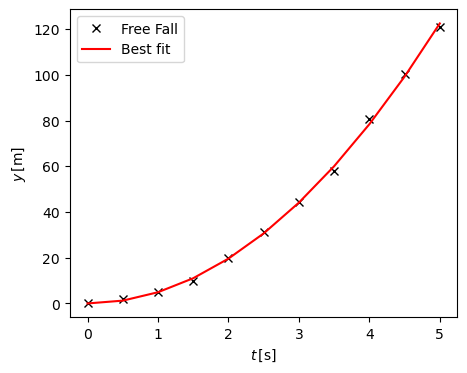

In [29]:
# Fig env:

plt.figure(figsize=(5,4))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall")

plt.plot(time, ypos_fit, color = "red", linestyle = "-", label = "Best fit")

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

### Calculation of the acceleration of gravity:

$$\alpha = \frac{g}{2}$$

In [30]:
# Calculate g

grav = coef[0]*2

# Print result:
print('g = %.5f m/s^2' % (grav))

g = 9.80552 m/s^2


In [31]:
#GET the erros:
print(np.sqrt(np.diag(cova))) ##The error is elaborated for alpha, so to change the error to the propagation error for g

## alpha=g/2 -> g=2 alpha  --> sigma_alpha transforming to sigma_g--> sigma_g= abs(2)*sigma_alpha
err_g=2*np.sqrt(np.diag(cova))[0]
print("The error in the gravity:",2*np.sqrt(np.diag(cova))[0]) ##Array in array
##PRINT FINAL RESULT:

print('g = (%.5f  +/- %.5f) m/s^2' % (grav, err_g))

[0.03243905]
The error in the gravity: 0.06487810029301239
g = (9.80552  +/- 0.06488) m/s^2


## Example 3: Fitting spectral lines (advanced)

In this exercise we will be fitting Gaussian functions to spectral lines of the $\rm H_I$ transition of the Hydrogen atom. This is a forbidden transition that occurs as a result of its hyperfine structure.


Let us assume the spin of the p+ is down, then the $\rm H_I$ transition occurs when the spin of the electron flips from up to down (i.e. when going from anti-parallel to parallel). The spin up configuration has a slightly higher energy than the spin down because the magnetic dipole moments are parallel, so when it flips it releases a low-energy photon and goes into the spin down configuration, which has lower energy as the the magnetic dipole moments are anti-parallel.


**And some nice extra details from Wikipedia:**

"This transition is highly forbidden with an extremely small transition rate of $2.9\times 10^{-15}\,\rm s^{-1}$ and a mean lifetime of the excited state of around 10 million years. A spontaneous occurrence of the transition is unlikely to be seen in a laboratory on Earth, but it can be artificially induced using a hydrogen maser. It is commonly observed in astronomical settings such as hydrogen clouds in our galaxy and others. Because of its long lifetime, the line has an extremely small natural width, so most broadening is due to Doppler shifts caused by bulk motion or nonzero temperature of the emitting regions."

The transition.


- At 21 cm, 1.4 GHz.


- The data are taken from the GASS survey (shared via private communication).


- This survey uses the Parkes telescopes in Australia.


If you are interested in more information, I am leaving the links below:

Parkes: https://www.parkes.atnf.csiro.au/


Datafile: https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/104444.9-264831_gass_spectrum.txt

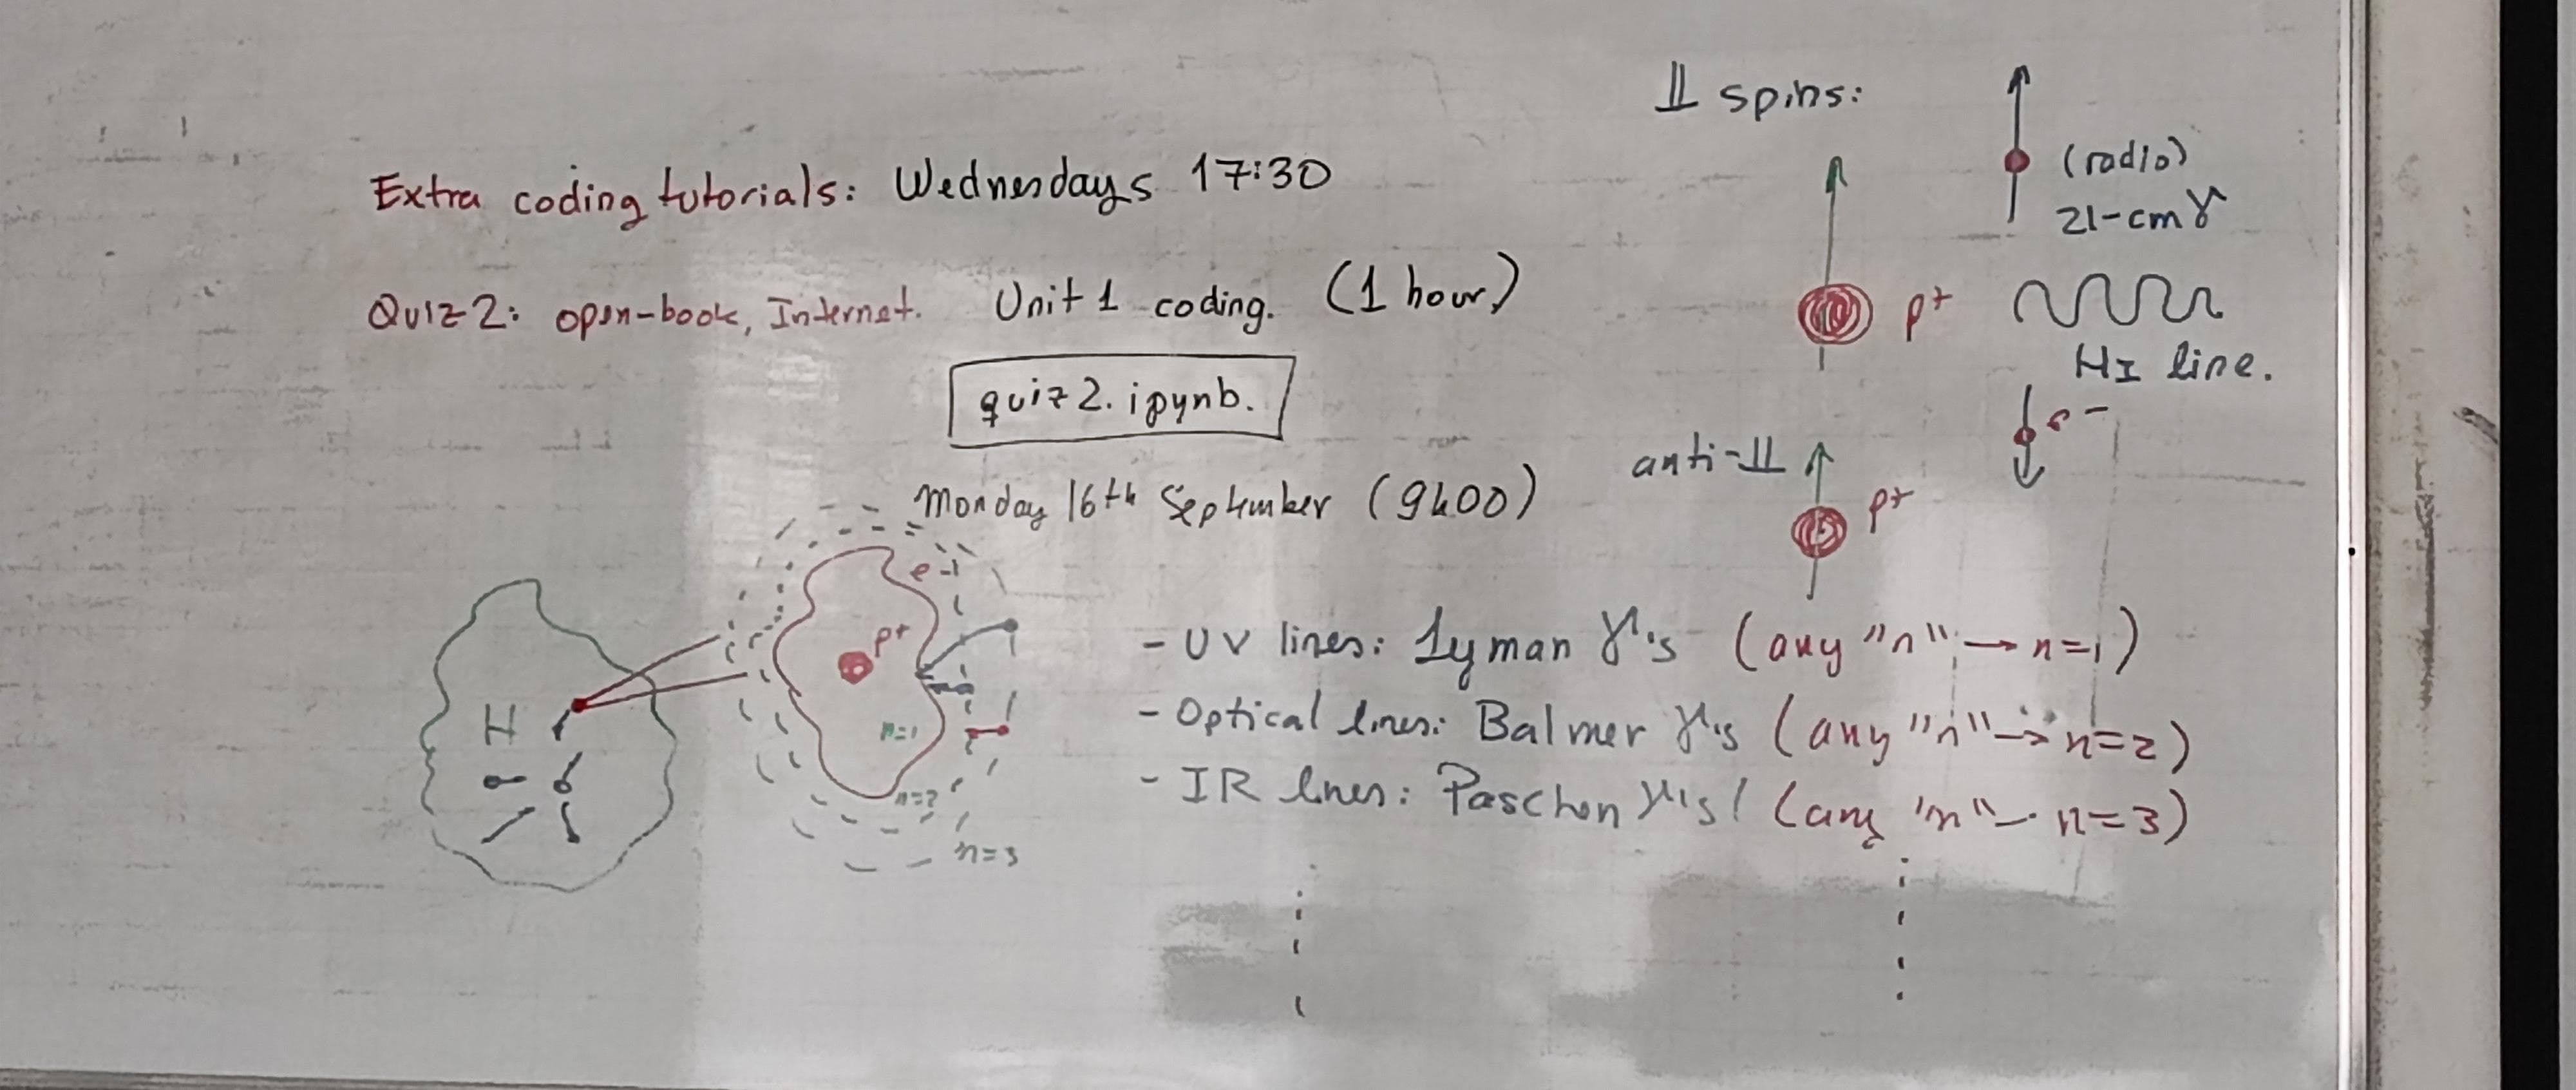

If we have some peaks this could give us a merged: 
And our work must be the separation of signals to determine


Source: sun-> is emmiting radiation at several wavelenght, peaks in optical, atmosphere absorve determined wavelength also
Solar spectrum as seen from Earth: black body spectrum
T-> <800K


Additional explanation:
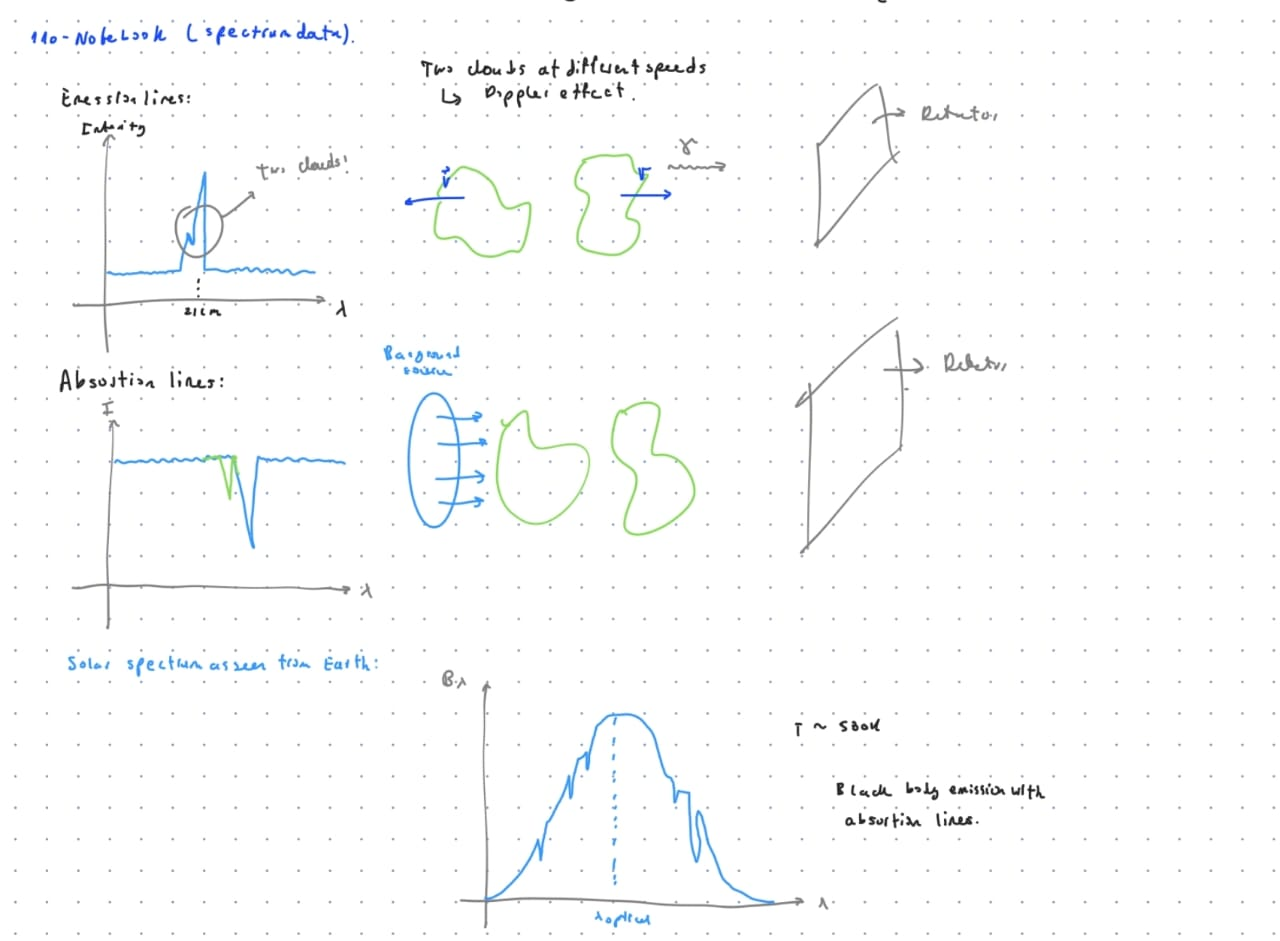

## 1. Data I/O:

In [50]:
# Let's place the data into a pandas DF

h1_df = pd.read_csv("../DATA/104444.9-264831_gass_spectrum.txt"\
                   , sep = r"\s+")

print(h1_df)
##Tb= how much radiation you will receive, intensity
##x axis-> lambda, \vgreek, velocity

#At the begining comes in frequency

       velocity        Tb
0   -494.424011 -0.004997
1   -490.500011  0.010002
2   -486.576011  0.017502
3   -482.652011  0.027504
4   -478.728011 -0.014999
..          ...       ...
248  478.727995  0.002502
249  482.651995 -0.012497
250  486.575995  0.007500
251  490.499995 -0.017502
252  494.423995 -0.044998

[253 rows x 2 columns]


In [33]:
# Place the data columsn into arrays

h1_vel = np.array(h1_df["velocity"])
h1_int = np.array(h1_df["Tb"])

print(h1_int)

[-4.99725340e-03  1.00021360e-02  1.75018310e-02  2.75039670e-02
 -1.49993900e-02  1.75018310e-02 -4.99725340e-03 -4.49981700e-02
  3.25012200e-02  2.24990840e-02 -2.50015260e-02 -2.50015260e-02
 -2.24990840e-02 -2.50015260e-02  2.24990840e-02  4.49981700e-02
  7.49969500e-03 -1.49993900e-02 -2.99987800e-02  1.75018310e-02
  0.00000000e+00  2.00042720e-02  2.50244140e-03 -7.49969500e-03
 -1.00021360e-02  2.75039670e-02 -2.49481200e-03 -1.75018310e-02
  1.75018310e-02  2.75039670e-02 -1.24969480e-02 -7.49969500e-03
  1.75018310e-02  2.24990840e-02  7.49969500e-03  5.24978640e-02
 -1.75018310e-02 -2.24990840e-02 -2.99987800e-02  2.50244140e-03
  2.75039670e-02 -2.50015260e-02 -4.00009160e-02 -1.75018310e-02
 -2.99987800e-02 -1.99966430e-02 -2.24990840e-02  5.50003050e-02
  2.99987800e-02  2.24990840e-02  7.49969500e-03 -2.50015260e-02
  2.50015260e-02  3.74984740e-02  6.00051880e-02 -3.25012200e-02
  2.24990840e-02 -2.74963380e-02  5.00488300e-03 -2.74963380e-02
  5.00488300e-03  2.24990

## 2. Data inspection:

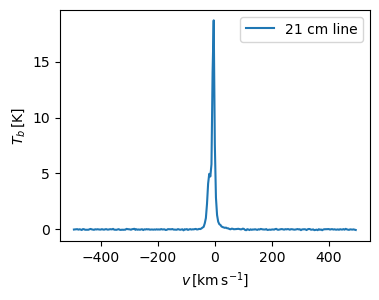

In [34]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.show()

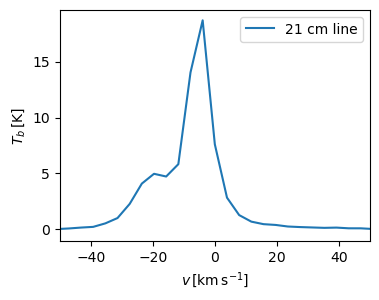

In [35]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

# A: First attempt

## 2. Regression model (1 Gaussian - bad model):

$$f(x) = a \exp\left( -b\,(x + c)^2 \right)$$


In [51]:
# Function for the Gaussian
#a,b -> width of the distribution
#c-> How displaced the gaussian is
def one_gaussian(x, a, b, c):
    """
    This defnes a 1-Gaussian model for the regression.
    This may not be the best model because we see 2 components.
    Inputs: x-> velocity vector, a in the height of the Gaussian,
            b-> is the width, c -> displacement
    Output: y -> 1D 1-Gaussian model
    """
    
    # 1D Gaussian
    y = a*np.exp(-b*(x + c)**2)
    
    return y

## 3. Optimisation using curve_fit:

- This step will tells us the values of a, b, and c that best fit the data.

In [52]:
# Regression with curve_fit

coef, cova = opt.curve_fit(one_gaussian, h1_vel, h1_int) #(mode, x_axis, y_axis)

print("Best-fit values are:\n", coef)

print("The covariance matrix is:\n", cova) #Diagonal matrix

Best-fit values are:
 [17.28888355  0.02146926  5.3429419 ]
The covariance matrix is:
 [[1.85376734e-01 3.06952769e-04 1.99837645e-06]
 [3.06952769e-04 1.52459483e-06 9.26057747e-09]
 [1.99837645e-06 9.26057747e-09 1.92585519e-02]]


/tmp/ipykernel_204769/1055834664.py:14: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2)


### Regression uncertainties

In [38]:
# Calculate uncertainties
unc_param = np.sqrt(np.diag(cova)) #Using the diagonal of matrix and sqaure root of that

print("The associated uncertainties are:\n", unc_param)

The associated uncertainties are:
 [0.43055398 0.00123474 0.13877518]


## 4. Plot the results:

In [39]:
# Evaluate our models using the best-fit params

h1_int_fit = one_gaussian(h1_vel, *coef) #*coef-> call all the coefficients

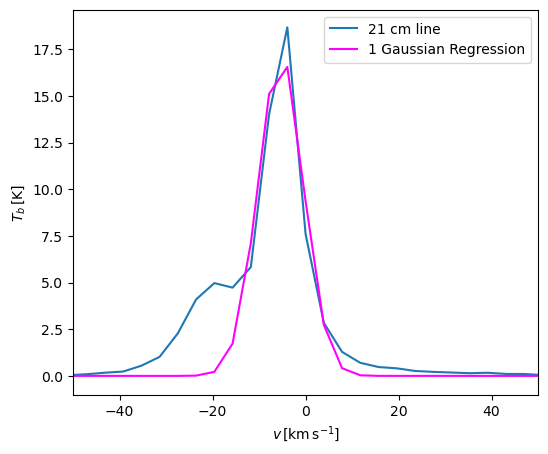

In [40]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# Regression
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

# B: Second attempt

## 2. Regression model (2 Gaussians - good model):

$$f(x) = a \exp\left( -b\,(x + c)^2 \right) + d \exp\left( -e\,(x + f)^2 \right)$$


In [53]:
# Function for the Gaussian
"""
-b & -e   =1/(sigma sqrt(2pi))
what give to us the velocity dispersions
"""
def two_gaussian(x, a, b, c, d, e, f):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d are the heights of the
            Gaussians,
            b, e-> are the widths,
            c, f -> are the displacements... The central velocities
    Output: y -> 1D 2-Gaussian model
    """
    
    # 2D Gaussian
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)
    
    return y

## 3. Optimisation using curve_fit:

- This step will tells us the values of a, b, and c that best fit the data.

In [54]:
# Regression with curve_fit

coef2, cova2 = opt.curve_fit(two_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef2) #Best fit values, are the values that we are looking for, about the constants that we used

print("The covariance matrix is:\n", cova2) #covariance matrix-> size depends on how many free parameters we have, 6x6 matrix

Best-fit values are:
 [5.34482159e+00 3.33574506e-03 1.19767757e+01 1.50333020e+01
 5.59263392e-02 4.76060183e+00]
The covariance matrix is:
 [[ 5.92441611e-03  3.09872054e-06 -7.00843395e-03 -4.82952525e-03
   4.56184068e-05 -2.67950672e-04]
 [ 3.09872054e-06  5.70150761e-09 -1.10251922e-06 -1.56364585e-06
   6.90187943e-09 -5.93347403e-07]
 [-7.00843395e-03 -1.10251922e-06  3.33735421e-02  1.04166199e-02
  -1.02060270e-04 -8.21531506e-04]
 [-4.82952525e-03 -1.56364585e-06  1.04166199e-02  1.43334149e-02
  -2.35140145e-06  1.77883992e-04]
 [ 4.56184068e-05  6.90187943e-09 -1.02060270e-04 -2.35140145e-06
   1.16529830e-06  3.83561568e-06]
 [-2.67950672e-04 -5.93347403e-07 -8.21531506e-04  1.77883992e-04
   3.83561568e-06  6.22390507e-04]]


/tmp/ipykernel_204769/1802437137.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)


### Regression uncertainties


In [43]:
# Calculate uncertainties
unc_param2 = np.sqrt(np.diag(cova2))

print("The associated uncertainties are:\n", unc_param2)

The associated uncertainties are:
 [7.69702287e-02 7.55083281e-05 1.82684269e-01 1.19722241e-01
 1.07948983e-03 2.49477555e-02]


## 4. Plot the results:

In [44]:
# Evaluate our models using the best-fit params

h1_int_fit2 = two_gaussian(h1_vel, *coef2)

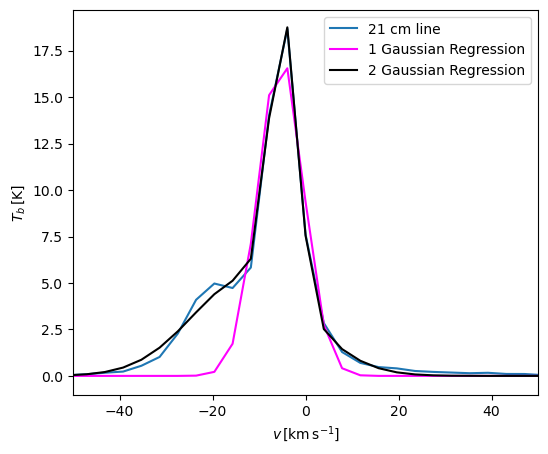

In [45]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## 5. Replot with each component separately:

In [46]:
# Evaluate each Gaussian

gaussian_1 = one_gaussian(h1_vel, coef2[0], coef2[1], coef2[2]) #defining each gaussian

gaussian_2 = one_gaussian(h1_vel, coef2[3], coef2[4], coef2[5]) #defining each gaussian-> these gaussian compose one as we see in the previous image

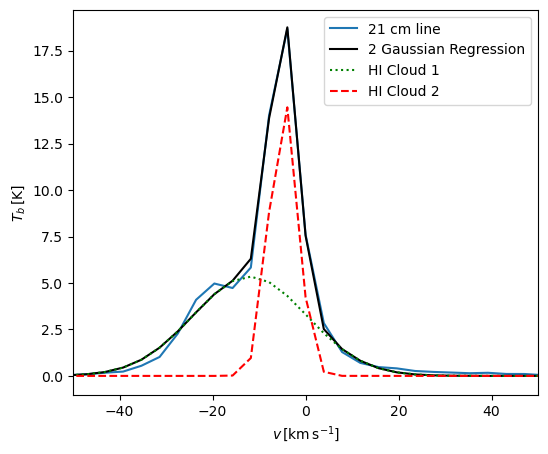

In [47]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
#plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")

# Gaussian 1
plt.plot(h1_vel, gaussian_1, linestyle = ":", color = "green", label = "HI Cloud 1")

# Gaussian 2
plt.plot(h1_vel, gaussian_2, linestyle = "--", color = "red", label = "HI Cloud 2")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

#According the energies we can check-> the width can change... 
#Several factor that can determine the width of the line-> temperature, density -> how much gas we have, the peak could be higher.
#Shift-> the velocities of both, where the peaks are and the difference in the position of the peaks

## 6. Summarise our findings:

In [48]:
print("The central velocity in km/s of the HI cloud 1 is: ", -coef2[2])

print("The central velocity on km /s of the HI cloud 2 is: ", -coef2[5])

print("The relative velocity between the HI clouds: ", abs(coef2[5]-coef2[2]))



The central velocity in km/s of the HI cloud 1 is:  -11.976775717068115
The central velocity on km /s of the HI cloud 2 is:  -4.760601830332313
The relative velocity between the HI clouds:  7.216173886735802


$$b=\frac{1}{2\sigma_v^2}$$

$$\sigma_v=\sqrt{\frac{1}{2b}}$$

In [49]:
# CLoud 1 dispersion 

sigma_v1 = np.sqrt(1./(2*coef2[1]))
"""
-b & -e   =1/(sigma sqrt(2pi))
what give to us the velocity dispersions
"""
# CLoud 2 dispersion 

sigma_v2 = np.sqrt(1./(2*coef2[4]))

print("The velocity dispersion in km/s of the HI cloud 1 is: ", sigma_v1)

print("The velocity dispersion in km /s of the HI cloud 2 is: ", sigma_v2)




The velocity dispersion in km/s of the HI cloud 1 is:  12.243020497860062
The velocity dispersion in km /s of the HI cloud 2 is:  2.9900386772617855
